# Importing the Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

# Preprocessing

In [5]:
tweet_df = df[['text','airline_sentiment']]

In [6]:
tweet_df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


**We will select only Positive and Negative Reviews**

In [7]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']

In [8]:
X = tweet_df.text
y = tweet_df.airline_sentiment

# Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print("Training Set X Items: " + str(len(X_train)))
print("Training Set y Items: " + str(len(y_train)))

Training Set X Items: 9232
Training Set y Items: 9232


In [11]:
print("Test Set X Items: " + str(len(X_test)))
print("Test Set y Items: " + str(len(y_test)))

Test Set X Items: 2309
Test Set y Items: 2309


## One-Hot Encoding

In [12]:
review_labels_train = y_train.factorize()

In [13]:
review_labels_train

(array([0, 0, 0, ..., 1, 0, 0]),
 Index(['negative', 'positive'], dtype='object'))

In [14]:
review_labels_train[0]

array([0, 0, 0, ..., 1, 0, 0])

# Vectorization

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
vocab = X_train.values
vocab

array(['@USAirways Another dead end.  They only handle AA L&amp;F.  They gave me the same failed # I already had. 610-362-7498(99) VM full.  #lost',
       '@USAirways #2066. Was on plane from PBI to CLT and knew about the frozen water. Also saw a plane to NYC take off at the gate next door!',
       '@USAirways waiting for bags now over 25min in Phl bag claim!',
       ...,
       'Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E',
       "@united Okay thanks if you could please update me. I was told at the airport someone would call me today but they haven't.",
       '@USAirways IS THIS RINGLING BROTHERS BARNUM AND BAILEY???  SHOULD I KEEP MY EYES PEELED FOR THE CLOWN CAR???'],
      dtype=object)

In [17]:
tokenizer = Tokenizer(num_words=8000,oov_token='OOV')
tokenizer.fit_on_texts(vocab)

vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)

11636


In [18]:
len(tokenizer.word_index)

11635

In [19]:
# Saving the tokenized vocab for Web app
import pickle
pickle.dump(tokenizer, open('tokenizer.pickle', 'wb'))

## Padding Sequence

In [20]:
tweet = X_train.values

tweet_seqs = tokenizer.texts_to_sequences(tweet)

padded_sequence_train = pad_sequences(tweet_seqs, maxlen=300)
print(padded_sequence_train)

[[   0    0    0 ... 3560  364  141]
 [   0    0    0 ...   76  196  754]
 [   0    0    0 ...  304   79  354]
 ...
 [   0    0    0 ...   48   50    1]
 [   0    0    0 ...   32   57  353]
 [   0    0    0 ...    3 4197  569]]


In [21]:
print(padded_sequence_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

# Model Building

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
embedding_vector_length = 32

model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_length, input_length=300))
model.add(SpatialDropout1D(0.2))

model.add(LSTM(100))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           372352    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 425,653
Trainable params: 425,653
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# Saving the trained model 
model.save("sentiment_analysis.h5")

# Training the Model

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2)

In [27]:
model.fit(padded_sequence_train, review_labels_train[0], validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stop])

Epoch 1/10
231/231 [==============================] - 59s 246ms/step - loss: 0.4598 - accuracy: 0.8227 - val_loss: 0.2664 - val_accuracy: 0.8847
Epoch 2/10
231/231 [==============================] - 53s 230ms/step - loss: 0.2440 - accuracy: 0.9082 - val_loss: 0.2437 - val_accuracy: 0.9047
Epoch 3/10
231/231 [==============================] - 49s 212ms/step - loss: 0.1184 - accuracy: 0.9609 - val_loss: 0.2756 - val_accuracy: 0.8993
Epoch 4/10
231/231 [==============================] - 47s 205ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.3043 - val_accuracy: 0.9009


In [28]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,0.366551,0.853487,0.266440,0.884678
1,0.217125,0.917265,0.243655,0.904710
2,0.110156,0.961679,0.275598,0.899296
3,0.070953,0.975626,0.304321,0.900920


<AxesSubplot:>

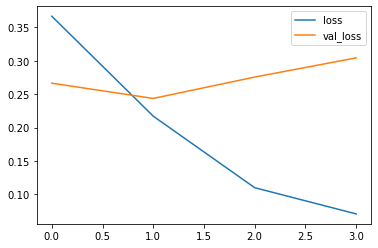

In [29]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

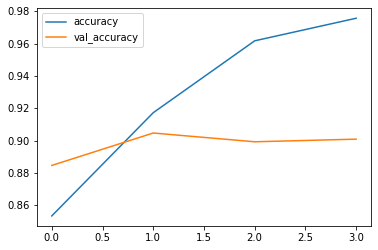

In [30]:
loss[['accuracy', 'val_accuracy']].plot()

# Preparation of test data

In [31]:
encoded_docs = tokenizer.texts_to_sequences(X_test)
padded_sequence_test = pad_sequences(encoded_docs, maxlen=300)
print(padded_sequence_test)

[[   0    0    0 ...   10    1   18]
 [   0    0    0 ...   48   50    1]
 [   0    0    0 ...    2 6450  529]
 ...
 [   0    0    0 ...   99    3  314]
 [   0    0    0 ... 1542   91    1]
 [   0    0    0 ...  200  106   30]]


In [32]:
sentiment_label_test = y_test.factorize()
sentiment_label_test[0]

array([0, 1, 0, ..., 0, 1, 0])

In [33]:
print('Accuracy:', model.evaluate(padded_sequence_test, sentiment_label_test[0])[1])

73/73 [==============================] - 4s 56ms/step - loss: 0.2666 - accuracy: 0.9225
Accuracy: 0.9224772453308105


# Load Model

In [34]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras import models

In [35]:
# model = models.load_model('sentiment_analysis.h5')
# model.summary()

In [36]:
# print('Accuracy:', model.evaluate(padded_sequence_test,sentiment_label_test[0])[1])

# Testing

In [37]:
import pickle
tokenizer = pickle.load(open('tokenizer.pickle', 'rb'))

In [38]:
len(tokenizer.word_index)

11635

In [39]:
# Test Review Sentence

test_word ="""
Doha to Mumbai. Excellent Service. Always on timw. Good seat quality and leg space. Best cabin crew in response, service. Very good healthy food. Good laugage handling. Excellent take off and landing. Very good check-in assistance
"""

tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=300)

tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [40]:
prediction = int(model.predict(tw).round().item())
outcome = (review_labels_train[1][prediction]).capitalize()

print("Actual Review: ", test_word)
print("\nAccuracy Criteria \n\nProbability Closer to 0 == Negative Sentiment\nProbability Closer to 1 == Positive Sentiment")

prob = model.predict(tw)[0][0]

print("\nSentiment Analysis Outcome: The review shows", (review_labels_train[1][prediction]).capitalize() + " sentiment.")
print()
print("Probability is " + str(prob))

Actual Review:  
Doha to Mumbai. Excellent Service. Always on timw. Good seat quality and leg space. Best cabin crew in response, service. Very good healthy food. Good laugage handling. Excellent take off and landing. Very good check-in assistance


Accuracy Criteria 

Probability Closer to 0 == Negative Sentiment
Probability Closer to 1 == Positive Sentiment

Sentiment Analysis Outcome: The review shows Positive sentiment.

Probability is 0.9711263


### In conclusion we

Loaded the dataset and took only our required features.

Did one-hot encoding for labels.

Did tokenization and padding of the words.

Build a sequential model with Embedding, LSTM and Dense layers and trained, which gave an accuracy of 0.92

Tested with a sample review to get the sentiment with probability score.